In [33]:
import numpy as np
import pandas as pd
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, timedelta
from scipy.spatial import distance
from matplotlib.colors import LinearSegmentedColormap

In [2]:
hall=pd.read_csv('garlin.csv', low_memory=False)

In [3]:
df=hall.copy()

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/msgothic.ttc"

font_prop = font_manager.FontProperties(fname=font_path)

plt.rcParams["font.family"] = font_prop.get_name()

In [6]:
seat=pd.read_csv('seat_coor.csv')

### 좌석 복구

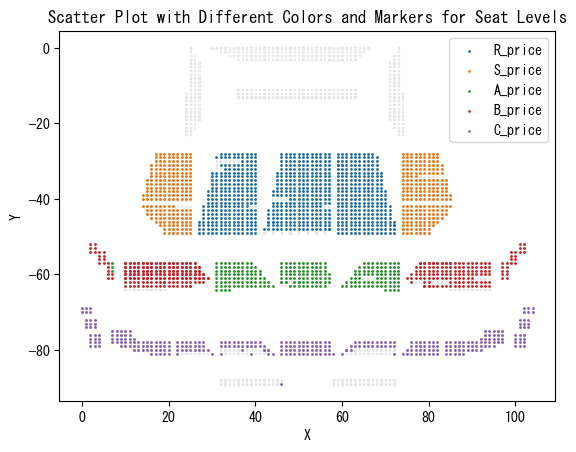

In [95]:
x_coords2, y_coords2 = seat['x'], seat['y']
condition=(df.label==123)
desired_order = ['R_price']+['S_price']+[val for val in sorted(df[condition&(df.grade!='R_price')&(df.grade!='S_price')].grade.unique())]
grouped = df[condition].groupby(pd.Categorical(df[condition].grade, categories=desired_order, ordered=True))
# 각 그룹에 대해 색상과 레이블 설정하여 산점도 그리기
for group_name, group_data in grouped:
    plt.scatter(group_data["x"], group_data["y"], label=group_name, s=1)

plt.scatter(x_coords2, y_coords2, marker='s', edgecolors='black', facecolors='none', s=1, linewidths=1, alpha=0.1)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Scatter Plot with Different Colors and Markers for Seat Levels')
plt.show()

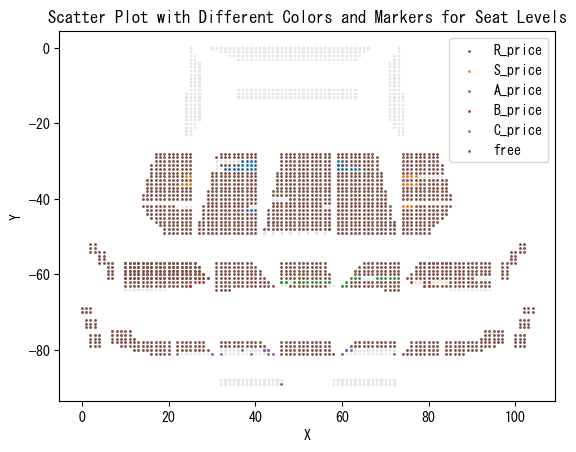

In [93]:
x_coords2, y_coords2 = seat['x'], seat['y']
condition=(df.label==123)
desired_order = ['R_price']+['S_price']+[val for val in sorted(df[condition&(df.seat_level!='R_price')&(df.seat_level!='S_price')].seat_level.unique())]
grouped = df[condition].groupby(pd.Categorical(df[condition].seat_level, categories=desired_order, ordered=True))
# 각 그룹에 대해 색상과 레이블 설정하여 산점도 그리기
for group_name, group_data in grouped:
    plt.scatter(group_data["x"], group_data["y"], label=group_name, s=1)

plt.scatter(x_coords2, y_coords2, marker='s', edgecolors='black', facecolors='none', s=1, linewidths=1, alpha=0.1)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['R_price']+['S_price']+[val for val in sorted(df[condition&(df.seat_level!='R_price')&(df.seat_level!='S_price')].seat_level.unique())])
plt.title('Scatter Plot with Different Colors and Markers for Seat Levels')
plt.show()